## Embeddings

Text embeddings are numerical representations of words, sentences or documents. They are used in many NLP tasks, such as sentiment analysis, machine translation, and question answering.

- Embeddings should capture features of words or concepts, and relationships between these.
- A sentence embedding is just like a word embedding, except it associates every sentence with a vector full of numbers, capturing similarities between sentences. 
- The key idea is that words/sentences with similar meanings will have similar vectors. This is useful for many tasks in natural language processing, such as sentiment analysis, machine translation, and question answering.

You can read more about text embeddings in this [👉 post](https://docs.cohere.com/docs/text-embeddings).

The following is an example of sentence embeddings, showing the distance between sentences. The distance is calculated using the dot product (cosine similarity) of the embeddings.

<!-- #TODO: use Hugging Face sentence transformers-->
<!-- #TODO: use UMAP -->


In [1]:
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(model="text-embedding-3-large")# embedding = OpenAIEmbeddings()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#| echo: true
sentences = [
    "Good morning, how are you?",
    "I am doing well, how about you?",
    "Hi, how are you doing today?",
    "Hey, what's up?",
    "I like apples.",
    "One of my daughters doesn't like kiwis.",
    "The other doesn't like bananas.",
    "The earth is the third planet from the sun.",
    "The moon is a natural satellite of the earth.",
    "Jupiter is the fifth planet from the Sun and the largest in the Solar System.",
    "The humpback whale is renowned for its enchanting songs, which are believed to serve various purposes, including communication, mating, and navigation during migration.",
    "Dolphins, highly intelligent marine mammals, communicate with each other using a complex system of clicks, whistles, and body language, enabling them to work together in hunting and navigation.",
    "The honeybee, through its pollination efforts, plays a vital role in agriculture, contributing to the growth of many of the fruits and vegetables humans rely on for sustenance.",
    "The Large Plane Trees, also known as Road Menders at Saint-Rémy, is an oil-on-canvas painting by Vincent van Gogh.",
    "Pablo Picasso's Guernica, an iconic mural-sized oil painting, stands as a poignant representation of the horrors of war.",
    "This powerful artwork was created in response to the bombing of the town of Guernica during the Spanish Civil War."
]

In [3]:
embeddings = np.array([embedding.embed_query(sentence) for sentence in sentences])

dot_product_matrix = np.dot(embeddings, embeddings.T)

df = pd.DataFrame(dot_product_matrix, columns=range(1, len(embeddings)+1))

df['embedding_index'] = range(1, len(embeddings)+1)

df = df.melt(id_vars=['embedding_index'], var_name='embedding_index_2', value_name='similarity')

In [4]:
#| echo: false
pd.set_option("display.max_colwidth", 600)
pd.set_option("display.max_rows", None)  # To display all rows
pd.set_option("display.width", 1000)  # Adjust the width as needed

sentences_df = pd.DataFrame(sentences, columns=['Sentences'])
sentences_df = sentences_df.reset_index(drop=True)
sentences_df.index += 1

display(sentences_df)

,Sentences
1,"Good morning, how are you?"
2,"I am doing well, how about you?"
3,"Hi, how are you doing today?"
4,"Hey, what's up?"
5,I like apples.
6,One of my daughters doesn't like kiwis.
7,The other doesn't like bananas.
8,The earth is the third planet from the sun.
9,The moon is a natural satellite of the earth.
10,Jupiter is the fifth planet from the Sun and the largest in the Solar System.


In [5]:
ojs_define(data = df)

```{ojs}
Plot.plot(
    {
        height: 640,
        padding: 0.05,
        grid: true,
        x: {"axis": "top", "label": "Embedding Index"},
        y: {"label": "Embedding Index"},
        color: {"type": "linear", "scheme": "PiYG"},
        marks: [
            Plot.cell(
                transpose(data),
                {x: "embedding_index", y: "embedding_index_2", fill: "similarity", tip: true},
            ),
            Plot.text(
                transpose(data),
                {
                    x: "embedding_index",
                    y: "embedding_index_2",
                    text: d => d.similarity.toFixed(2),
                    title: "title"
                },
            ),
        ],
    }
)
```


You can see that the sentences are grouped together by semantic similarity. For example, the sentences about fruit are grouped together, and the sentences about planets are grouped together, in the sense that they are similar to each other.


This is important: embeddings capture the meaning of words and sentences, and are the basis of LLMs' ability to "understand" language. 

Here is an alternative similarity plot, showing the general topic of each sentence. 


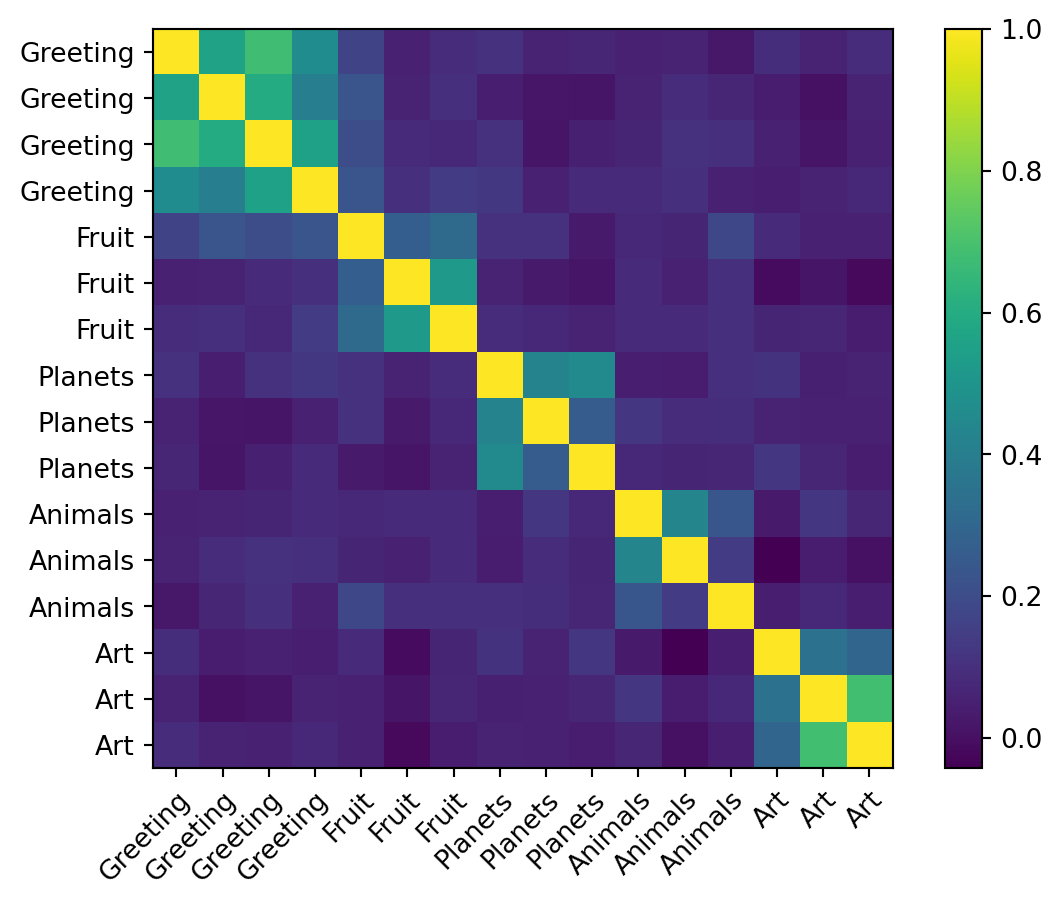

In [6]:
topics = {"Greeting": 4, "Fruit": 3,
          "Planets": 3, "Animals": 3,
          "Art": 3}
topics_repeated = [key for key, value in topics.items() for i in range(value)]


# Create the similarity matrix
embeddings = np.array([embedding.embed_query(sentence) for sentence in sentences])
dot_product_matrix = np.dot(embeddings, embeddings.T)

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(dot_product_matrix)

# Set the x and y axis labels
ax.set_xticks(np.arange(len(sentences)))
ax.set_yticks(np.arange(len(sentences)))
ax.set_xticklabels(topics_repeated)
ax.set_yticklabels(topics_repeated)

# Rotate the x axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()